# 연습문제

> 1. 군집을 어떻게 정의할 수 있나요? 몇 개의 군집 알고리즘을 말해보세요.

> 2. 군집 알고리즘의 주요 애플리케이션은 무엇인가요?

> 3. k-means를 사용할 때 적절한 클러스터 개수를 선택할 수 있는 두 가지 기법을 설명하세요.

> 4. 레이블 전파는 무엇인가요? 왜 이를 구현해야 하고 어떻게 구현할 수 있나요?

> 5. 대규모 데이터셋으로 확장할 수 있는 군집 알고리즘 두 개를 말해보세요. 밀도가 높은 지역을 찾는 군집 알고리즘 두 개는 무엇인가요?

6. 능동 학습이 유용한 경우는 언제인가요? 어떻게 구현할 수 있나요?

> 7. 이상치 탐지와 정상치 탐지의 차이는 무엇인가요?

> 8. 가우시안 혼합이 무엇인가요? 어떤 작업에 사용할 수 있나요?

> 9. 가우시안 혼합 모델을 사용할 때 적절한 클러스터 개수를 찾는 두 가지 기법을 말해보세요.

> 10. 전통적인 Olivetti 얼굴 데이터셋은 64x64 픽셀 크기의 흑백 얼굴 이미지 400개를 담고 있습니다. 각 이미지는 4,096크기의 1D 벡터로 펼쳐져 있습니다. 사람 40명의 사진을 10장씩 찍은 것입니다. 어떤 사람의 사진인지 예측하는 모델을 훈련하는 것이 일반적입니다. sklearn.datasets.fetch_olivetti_faces() 함수를 사용해 데이터셋을 불러오고 훈련 세트, 검증 세트, 테스트 세트로 나눕니다(이 데이터셋은 이미 0~1사이로 스케일이 조정되어 있습니다). 이 데이터셋은 매우 작으니 계층적 샘플링을 사용해 각 세트에 동일한 사람의 얼굴이 고루 섞이도록 하는 것이 좋습니다. 그 다음 k-means를 사용해 이미지를 군집해보세요. (이 장에서 소개한 기법 중 하나를 사용해) 적절한 클러스터 개수를 찾아보세요. 클러스터를 시각화해보세요. 각 클러스터에 비슷한 얼굴이 들어 있나요?

> 11. 올리베티 얼굴 데이터셋으로 계속해보겠습니다. 사진에 나타난 사람을 예측하는 분류기를 훈련하고 검증 세트에서 평가해보세요. ㄱ 다음 k-means를 차원 축소 도구로 사용하여 축소된 세트에서 분류기를 훈련해보세요. 분류기 성능을 최대로 만드는 클러스터 개수를 찾아보세요. 얼마나 성능이 나오나요? 축소된 세트에서 추출한 특성을 원본 특성에 추가하면 어떤가요? (여기서도 최선의 클러스터 개수를 찾아보세요)

> 12. 올리베티 얼굴 데이터셋에서 가우시안 혼합 모델을 훈련해보세요. \
알고리즘의 속도를 높이기 위해 데이터셋의 차원을 감소시켜야 할 것입니다(예를들면 분산의 99%를 유지하면서 PCA를 사용합니다). \
이 모델을 사용해 (sample()메서드로) 새로운 얼굴을 생성하고 시각화해보세요(PCA를 사용했다면 inverse_transform() 메서드를 사용해야 합니다). \
일부 이미지를 수정해보세요 (예를들면 회전, 뒤집기, 어둡게 하기). \
모델이 이상치를 감지하는지 확인해보세요(즉 정상 샘플과 이상치에 대해 score_samples() 메서드 출력을 비교해보세요).

In [9]:
from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces()

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=42)
train_valid_idx, test_idx = next(strat_split.split(olivetti.data, olivetti.target))
X_train_valid = olivetti.data[train_valid_idx]
y_train_valid = olivetti.target[train_valid_idx]
X_test = olivetti.data[test_idx]
y_test = olivetti.target[test_idx]

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=80, random_state=43)
train_idx, valid_idx = next(strat_split.split(X_train_valid, y_train_valid))
X_train = X_train_valid[train_idx]
y_train = y_train_valid[train_idx]
X_valid = X_train_valid[valid_idx]
y_valid = y_train_valid[valid_idx]

In [11]:
from sklearn.decomposition import PCA
import numpy as np

pca=PCA(n_components=0.99)
X_train_pca = pca.fit_transform(X_train)

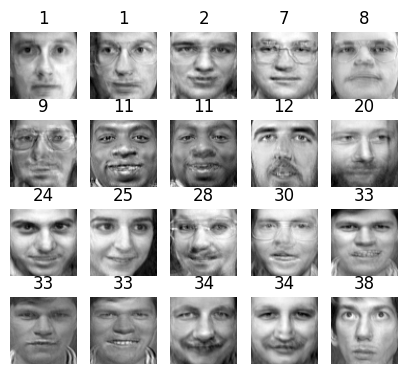

In [12]:
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()
    
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

gm = GaussianMixture(n_components=40, random_state=42)
y_pred = gm.fit_predict(X_train_pca)
n_gen_faces = 20
gen_faces_reduced, y_gen_faces = gm.sample(n_samples=n_gen_faces)
gen_faces = pca.inverse_transform(gen_faces_reduced)
plot_faces(gen_faces, y_gen_faces) # 복원한 이미지

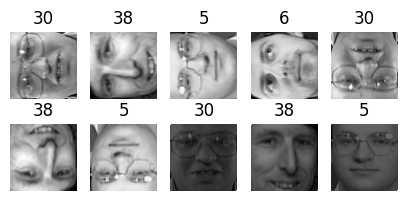

In [13]:
n_rotated = 4
rotated = np.transpose(X_train[:n_rotated].reshape(-1, 64, 64), axes=[0, 2, 1])
rotated = rotated.reshape(-1, 64*64)
y_rotated = y_train[:n_rotated]

n_flipped = 3
flipped = X_train[:n_flipped].reshape(-1, 64, 64)[:, ::-1]
flipped = flipped.reshape(-1, 64*64)
y_flipped = y_train[:n_flipped]

n_darkened = 3
darkened = X_train[:n_darkened].copy()
darkened[:, 1:-1] *= 0.3
y_darkened = y_train[:n_darkened]

X_bad_faces = np.r_[rotated, flipped, darkened]
y_bad = np.concatenate([y_rotated, y_flipped, y_darkened])

plot_faces(X_bad_faces, y_bad)

> 13. 일부 차원 축소 기법은 이상치 탐지를 위해서 사용할 수도 있습니다. \
예를 들어 올리베티 얼굴 데이터셋을 PCA를 사용해 분산의 99% 유지하도록 축소해보세요. \
그 다음 각 이미지의 재구성 오차를 계산합니다. 그 다음 이전 연습문제에서 만든 수정된 이미지를 선택해 재구성 오차를 확인해보세요. \
재구성 오차가 얼마나 커지는지 확인하세요. 재구성 이미지를 출력해보면 이유를 알 수 있습니다. \
정상 얼굴을 재구성하기 때문입니다.

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=42)
train_valid_idx, test_idx = next(strat_split.split(olivetti.data, olivetti.target))
X_train_valid = olivetti.data[train_valid_idx]
y_train_valid = olivetti.target[train_valid_idx]
X_test = olivetti.data[test_idx]
y_test = olivetti.target[test_idx]

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=80, random_state=43)
train_idx, valid_idx = next(strat_split.split(X_train_valid, y_train_valid))
X_train = X_train_valid[train_idx]
y_train = y_train_valid[train_idx]
X_valid = X_train_valid[valid_idx]
y_valid = y_train_valid[valid_idx]

In [25]:
print(X_train.shape, X_train_pca.shape, y_train.shape)

(280, 4096) (280, 199) (280,)


<AxesSubplot:>

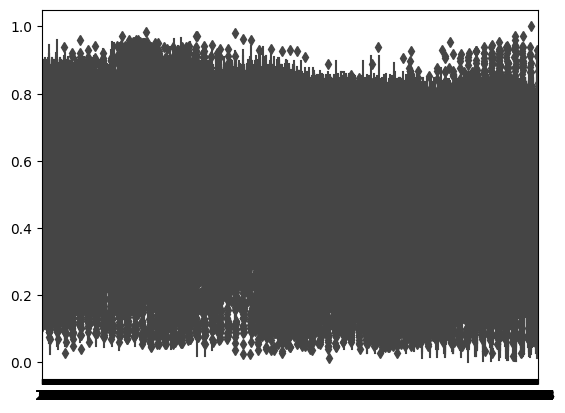

In [15]:
import seaborn as sns

sns.boxplot(X_train)

<AxesSubplot:>

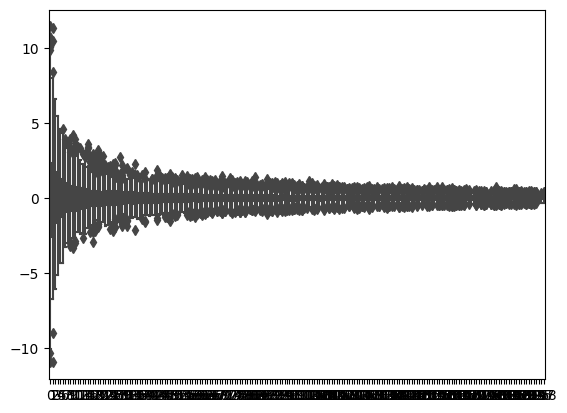

In [23]:
sns.boxplot(X_train_pca)

In [16]:
from sklearn.decomposition import PCA
import numpy as np

# pca = PCA()
# pca.fit(X_train)
# cumsum = np.cumsum(pca.explained_variance_ratio_)
# d = np.argmax(cumsum >= 0.99) + 1
pca=PCA(n_components=0.99)
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_valid)
X_test_pca = pca.transform(X_test)

pca.n_components_

199

In [17]:
X_preimage = pca.inverse_transform(X_train_pca)

from sklearn.metrics import mean_squared_error

mean_squared_error(X_train, X_preimage)

0.0001920535

In [48]:
# pca image 
# X_train_pca.shape
# X_train_pca=X_train_pca.reshape(-1, 70, 199)

TypeError: Invalid shape (4, 70, 199) for image data

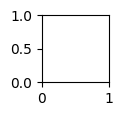

In [49]:
# # plot_faces(X_train_pca, y_train)
# # plt.imshow(X_train_pca)
# n_cols=5
# # X_train_pca = X_train_pca.reshape(-1, 64, 64)
# n_rows = (len(X_train_pca) - 1) // n_cols + 1
# plt.figure(figsize=(n_cols, n_rows * 1.1))
# for index, (face, label) in enumerate(zip(X_train_pca, y_train)):
#     plt.subplot(n_rows, n_cols, index + 1)
#     plt.imshow(X_train_pca, cmap="gray")
#     plt.axis("off")
#     plt.title(label)
# plt.show()
    

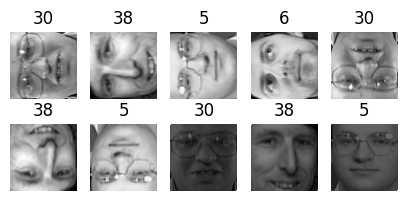

In [18]:
plot_faces(X_bad_faces, y_bad)

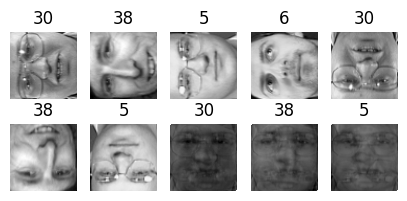

In [19]:
X_bad_faces_pca=pca.fit_transform(X_bad_faces)
X_bad_faces_reconstructed = pca.inverse_transform(X_bad_faces_pca)
plot_faces(X_bad_faces_reconstructed, y_bad)

In [20]:
mean_squared_error(X_bad_faces, X_bad_faces_reconstructed)

0.00017452126